# Análisis exploratorio de los datos 2
# INE - Permisos de Edificación
## Trabajo MDS-2oTrim. ==> Inmigracion en Chile

**Profesora:** Donoso I.<br>
**Alumnos:** Briceno, H.; Rovai, M.; Tessada G.

# Descripcion del dataset
Los permisos de edificación (PE) representan la intención de construir y tienen por objeto autorizar una construcción, de cualquier superficie y destino; solicitud que se inicia en la Dirección de Obras del Municipio de cada comuna del país. Se encuentran en la siguiente direccion: http://www.ine.cl/herramientas/galeria-de-mapas/permisos-de-edificacion 

De acuerdo con esta información, el INE publica mes a mes tabulados y a través
de un boletín el análisis de los PE, donde se detalla el total de superficie
autorizada por destino. Además se divulga un informe anual con cuadros
estadísticos que resumen la información por sector y destino a nivel regional y
nacional.

Importacion de las librerias

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline  
import warnings
warnings.filterwarnings("ignore")

## 1. Importar el dataset

In [2]:
!ls ./data

PDs-2005-2016.xlsx                      Visas-2018_1.xlsx
PDs-2017.xlsx                           frec_casos_dmcs_mensual_2001_2017w.xlsx
PDs_2018_1.xlsx                         inmigrantes_metropolitana.xlsx
Visas-2005-2010.xlsx                    inmigrantes_rm_comuna.xlsx
Visas-2011-2016.xlsx                    pe_2010-2017.xlsx
Visas-2017.xlsx


Definimos los dataframe con la data Raw

In [3]:
df1 = pd.read_excel('./data/pe_2010-2017.xlsx')
df1.shape # (114690, 11)

(114690, 11)

In [4]:
df1.head(2)

,ID,COD_REG,CUT,Comuna,Año,cantidad_unidad,num_pisos,glosa_destino,uso_destino,superficie,Localización
0,110120100001,1,1101,Iquique,2010,5,2,Casa continua,HABITACIONAL,307,RANGE_INTERPOLATED
1,110120100002,1,1101,Iquique,2010,1,1,Casa continua,HABITACIONAL,98,RANGE_INTERPOLATED


Describimos la informacion dentro de la data 

In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114690 entries, 0 to 114689
Data columns (total 11 columns):
ID                 114690 non-null int64
COD_REG            114690 non-null int64
CUT                114690 non-null int64
Comuna             114690 non-null object
Año                114690 non-null int64
cantidad_unidad    114690 non-null int64
num_pisos          114690 non-null int64
glosa_destino      114690 non-null object
uso_destino        114690 non-null object
superficie         114690 non-null int64
Localización       114690 non-null object
dtypes: int64(7), object(4)
memory usage: 9.6+ MB


## 2. Limpiar el dataset

Se procede a realizar la limpieza del data set con la con las mismas funciones utilizadas en la definicion del data set de visas. 

Se define una funcion para quitar tildes y demas signos que nos faciliten el procesamiento.

In [6]:
def replaceCaracteres(text):
    text = text.replace('á', 'a')
    text = text.replace('é', 'e')
    text = text.replace('í', 'i')
    text = text.replace('ó', 'o')
    text = text.replace('ú', 'u')
    text = text.replace('ñ', 'n')
    text = text.replace('ã', 'a')
    return text

Se define la funcion para la limpieza del texto de todas las variables

In [7]:
def limpiaTexto(text):
    text = text.lower()
    text = replaceCaracteres(text)
    return text 

Aplicamos esto para las variables de la data que mayormente presentan estos signos

In [8]:
df1['Comuna'] = df1.Comuna.apply(limpiaTexto)

Vemos como resulta

In [9]:
df1.Comuna.value_counts()

chillan                3405
colina                 3187
los angeles            3178
talca                  2732
curico                 2686
valparaiso             2663
temuco                 2639
valdivia               2530
cauquenes              2442
linares                2404
osorno                 2137
concepcion             2017
alto hospicio          1877
san carlos             1843
puerto montt           1760
melipilla              1681
coquimbo               1651
coronel                1568
antofagasta            1522
castro                 1503
punta arenas           1431
talcahuano             1391
la serena              1359
machali                1358
quilpue                1341
san pedro de la paz    1296
santiago               1280
pichilemu              1275
angol                  1273
puerto varas           1256
                       ... 
quilicura               463
calera                  445
padre hurtado           424
vitacura                403
isla de pascua      

Efectivamente nos decisimos de los signos y tildes en las variables que deseabamos

Realizamos una contabilizacion de los valores nulos dentro de los datos

In [10]:
df1.isnull().sum(axis=0)

ID                 0
COD_REG            0
CUT                0
Comuna             0
Año                0
cantidad_unidad    0
num_pisos          0
glosa_destino      0
uso_destino        0
superficie         0
Localización       0
dtype: int64

Definimos los codigos de las regiones para eventualmente proceder a seleccionar las que nos interesan

In [11]:
df1.COD_REG.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15])

Apartir de aca y sabiendo que dentro de la cofidificacion de la region metrooplitana viene dada por el 13 la cual es propuesta por el INE, se procede a seleccionar esta para enfocar el analisis solos en la RM. 

In [12]:
df1[df1.COD_REG==13].Comuna.unique()

array(['santiago', 'cerrillos', 'cerro navia', 'conchali', 'el bosque',
       'estacion central', 'huechuraba', 'independencia', 'la cisterna',
       'la florida', 'la granja', 'la pintana', 'la reina', 'las condes',
       'lo barnechea', 'lo espejo', 'lo prado', 'macul', 'maipu', 'nunoa',
       'pedro aguirre cerda', 'penalolen', 'providencia', 'pudahuel',
       'quilicura', 'quinta normal', 'recoleta', 'renca', 'san joaquin',
       'san miguel', 'san ramon', 'vitacura', 'puente alto', 'pirque',
       'san jose de maipo', 'colina', 'lampa', 'san bernardo', 'buin',
       'paine', 'melipilla', 'talagante', 'padre hurtado', 'penaflor'],
      dtype=object)

Apartir de aca nos desacemos de variables que consideramos que no son relevantes para nuestro analisis

In [13]:
df = df1[df1.COD_REG == 13]
df.shape

(29330, 11)

In [14]:
df.head()

,ID,COD_REG,CUT,Comuna,Año,cantidad_unidad,num_pisos,glosa_destino,uso_destino,superficie,Localización
81426,1310120100001,13,13101,santiago,2010,2,2,Casa continua; Comercio,MIXTO,213,ROOFTOP
81427,1310120100002,13,13101,santiago,2010,1,1,Comercio,NO HABITACIONAL,250,ROOFTOP
81428,1310120100003,13,13101,santiago,2010,2,8,Comercio; Oficinas sin destino específico,NO HABITACIONAL,32880,RANGE_INTERPOLATED
81429,1310120100004,13,13101,santiago,2010,1,1,Comercio,NO HABITACIONAL,244,ROOFTOP
81430,1310120100005,13,13101,santiago,2010,1,3,"Jardines infantiles, parvularios",NO HABITACIONAL,1038,ROOFTOP


Se observa que existen atributos del data set que no se perciben sean fundamentales para el analisis que deseamos realizar, por loq ue se procede a eliminar las coumnas que no son necesarias.

In [15]:
del df['ID']
del df['COD_REG']
del df['CUT']
del df['Localización']

In [16]:
df.head()

,Comuna,Año,cantidad_unidad,num_pisos,glosa_destino,uso_destino,superficie
81426,santiago,2010,2,2,Casa continua; Comercio,MIXTO,213
81427,santiago,2010,1,1,Comercio,NO HABITACIONAL,250
81428,santiago,2010,2,8,Comercio; Oficinas sin destino específico,NO HABITACIONAL,32880
81429,santiago,2010,1,1,Comercio,NO HABITACIONAL,244
81430,santiago,2010,1,3,"Jardines infantiles, parvularios",NO HABITACIONAL,1038


Ahora se establece el conteo del uso de destino, en este analisis nos basaremos en los desarrollos habitacionales dados en la region metroplitana en el periodo de 2010 al 2017, con esta logica de analisis se procede el uso de destino HABITACIONAL, y se descarta los NO HABITACIONAL

In [17]:
df.uso_destino.value_counts()

HABITACIONAL       20162
NO HABITACIONAL     7349
MIXTO               1819
Name: uso_destino, dtype: int64

En muchos casos los desarrollos mixtos son establecidos mas tanto comerciales como habitacionales por lo que se se utiliza el mixto y se une al habitacional.

In [18]:
df.uso_destino.replace(to_replace = 'MIXTO',value= 'HABITACIONAL', inplace=True)

In [19]:
df.uso_destino.value_counts()

HABITACIONAL       21981
NO HABITACIONAL     7349
Name: uso_destino, dtype: int64

 y con esto filtramos el dataframe solo con la vision de que sean utilizados para destino habitacional

In [20]:
df = df[df.uso_destino == 'HABITACIONAL']

Como esta variable no es fundamental para nuestro analisis se desecha del dataframe

In [21]:
del df['uso_destino']

In [22]:
df.head()

,Comuna,Año,cantidad_unidad,num_pisos,glosa_destino,superficie
81426,santiago,2010,2,2,Casa continua; Comercio,213
81431,santiago,2010,113,7,Dos edificios o bloques,5568
81432,santiago,2010,1,1,Casa continua,46
81443,santiago,2010,1198,32,Edificio o bloque único; Locales comerciales; ...,68775
81444,santiago,2010,3,4,Edificio o bloque único; Comercio; Otros,1213


Con la misma logica de que los desarrollos habitacionales , la glosa de destino es fundamental discretirizar en nuestro analisis. 

In [23]:
df.glosa_destino.value_counts()

Casa aislada                                                                                                                      14946
Casa pareada                                                                                                                       3375
Edificio o bloque único                                                                                                             841
Casa continua                                                                                                                       661
Casa aislada; Comercio                                                                                                              309
Edificio o bloque único; Otros                                                                                                      260
Dos edificios o bloques                                                                                                             147
Casa pareada; Comercio                          

Como vemos son muchas categorias, se procede a filtrar solo las categorias que contienen las siglas de edificios. Este aspecto es sumamente fundamental ya que si bien la mayor concentracion de inmigrantes se puede pensar como hipotesis que viven mas asinados y por en su mayoria viven en desarrollos habtacionales como edificiones o conjuntos de edificios. Por lo que primordialmente se porcedera a hacer un filtro en esta glosa.

Primeramente se procese a realizar la limpieza de esta glosa. Con la finalidad de en toda glosa donde existan los edificios colocar edificio y donde exista casa colocar solo la palabra casa.

In [24]:
def limpia_uso(text):
    text = limpiaTexto(text)   
    if 'edificio' in text: text = 'edificio'
    elif 'casa' in text: text= 'casa'
    else: text = 'Sin identificacion'
    return text 

In [25]:
df.head(5)

,Comuna,Año,cantidad_unidad,num_pisos,glosa_destino,superficie
81426,santiago,2010,2,2,Casa continua; Comercio,213
81431,santiago,2010,113,7,Dos edificios o bloques,5568
81432,santiago,2010,1,1,Casa continua,46
81443,santiago,2010,1198,32,Edificio o bloque único; Locales comerciales; ...,68775
81444,santiago,2010,3,4,Edificio o bloque único; Comercio; Otros,1213


Aplicamos la funcion

In [26]:
df['glosa_destino'] = df.glosa_destino.apply(limpia_uso)

In [27]:
df.head(5)

,Comuna,Año,cantidad_unidad,num_pisos,glosa_destino,superficie
81426,santiago,2010,2,2,casa,213
81431,santiago,2010,113,7,edificio,5568
81432,santiago,2010,1,1,casa,46
81443,santiago,2010,1198,32,edificio,68775
81444,santiago,2010,3,4,edificio,1213


In [28]:
df.glosa_destino.value_counts()

casa        20242
edificio     1739
Name: glosa_destino, dtype: int64

In [29]:
df.head(10)

,Comuna,Año,cantidad_unidad,num_pisos,glosa_destino,superficie
81426,santiago,2010,2,2,casa,213
81431,santiago,2010,113,7,edificio,5568
81432,santiago,2010,1,1,casa,46
81443,santiago,2010,1198,32,edificio,68775
81444,santiago,2010,3,4,edificio,1213
81450,santiago,2010,3,3,casa,261
81455,santiago,2010,3,2,casa,198
81458,santiago,2010,2,2,casa,524
81469,santiago,2010,1,2,casa,52
81474,santiago,2010,4,1,casa,359


## 3. Analizar data
Este analisis se porpone para extraer informacion de los datos con la finalidad de considerar las variables de los atributos que mas nos convengan para la union de este data set con respecto al de los extranjeron. 

Es por ello que se propone realizar una visualizacion para evlaluar tendencias dentro de los datos.
Es de suponerse que la mayoria de los recintos donde se alojan los inmigrantes es edificios por lo que se propondra que el analisis este basado solo en edificios, en conjuntos de edificios, entre otros. 

Uno de los factores principales para el analisis en el desarrollo habitacional de la gran santiago es la llegada de nuevos inmigrantes y el desarrollo economico impulsado por la llegada de olas de inmigraciones. Es por ello que relacionando el año de mayor desarrollo y permisologia sera el primer analisis. 

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21981 entries, 81426 to 110754
Data columns (total 6 columns):
Comuna             21981 non-null object
Año                21981 non-null int64
cantidad_unidad    21981 non-null int64
num_pisos          21981 non-null int64
glosa_destino      21981 non-null object
superficie         21981 non-null int64
dtypes: int64(4), object(2)
memory usage: 1.2+ MB


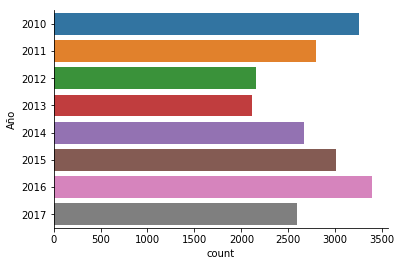

In [31]:
sns.countplot(y=df['Año'])
sns.despine()

Discretizamos para casas y edificios para evaluar los desarrollos y el factor tiempo. 

In [32]:
casas = df[df.glosa_destino == 'casa']

Visualizamos las casas y los años. 

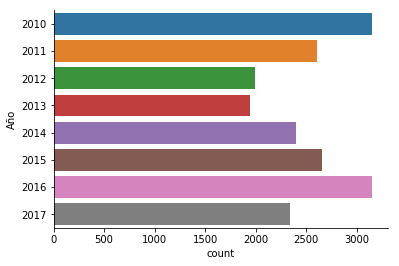

In [33]:
sns.countplot(y=casas['Año'])
sns.despine()

Ahora realizamos el analisis solo para edificaciones.

In [34]:
edificios = df[df.glosa_destino == 'edificio']

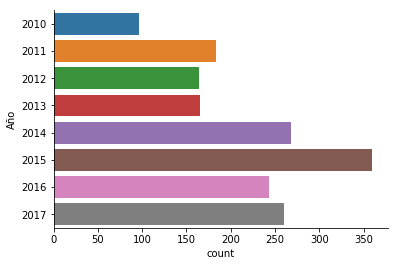

In [35]:
sns.countplot(y=edificios['Año'])
sns.despine()

Esto evidencia visualmente lo que propuso que a medida que ha venido pasando el tiempo existe un desarrollo habitacional de edificios para años pasado del 2010 mucho mas marcado. Esto se concatenara con la llegada de inmigrantes y las comunas. 

Realizamos un conteo de las casas en las principales comunas de la region metroplitana.

In [36]:
casas.Comuna.value_counts()

colina                 2833
melipilla              1452
cerro navia             846
penaflor                787
talagante               748
paine                   716
lampa                   692
el bosque               631
renca                   627
pirque                  618
lo barnechea            615
san bernardo            590
la florida              577
estacion central        533
penalolen               529
san ramon               488
puente alto             468
buin                    417
conchali                415
pedro aguirre cerda     412
maipu                   409
pudahuel                408
la cisterna             361
padre hurtado           347
las condes              329
la reina                320
recoleta                312
cerrillos               273
huechuraba              242
la pintana              238
la granja               215
santiago                209
lo prado                209
san jose de maipo       185
vitacura                181
macul               

Escogemos un top ten de las comunas con mas construcciones

In [37]:
top_comunas_casas = casas.Comuna.value_counts()
top_comunas_casas[0:10]

colina         2833
melipilla      1452
cerro navia     846
penaflor        787
talagante       748
paine           716
lampa           692
el bosque       631
renca           627
pirque          618
Name: Comuna, dtype: int64

Como vemos la mayoria de comunas de la gran santiago con respecto a las construcciones de casas estan a las afueras. En este sentido es de logica santiaguina que para estas comunas que en su mayoria no existe movilidad facil para un extranjero recien llegado, es por eso que se plantea que los edificios sean los mas idoneas para plantear el analisis de donde llegaria un extranjero.  Como factor determinante es la movilidad 

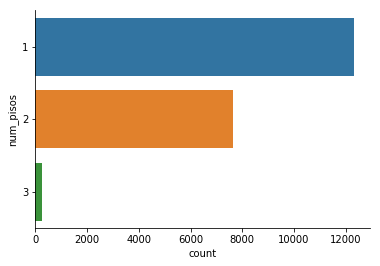

In [38]:
sns.countplot(y=casas.num_pisos)
sns.despine()

In [39]:
casas.describe()

,Año,cantidad_unidad,num_pisos,superficie
count,20242.000000,20242.000000,20242.000000,20242.000000
mean,2013.486019,5.462108,1.403221,525.118565
std,2.381779,31.051937,0.516078,2317.142198
min,2010.000000,1.000000,1.000000,8.000000
25%,2011.000000,1.000000,1.000000,58.000000
50%,2014.000000,1.000000,1.000000,119.000000
75%,2016.000000,1.000000,2.000000,244.000000
max,2017.000000,1278.000000,3.000000,83667.000000


Las casas són de 1 a 3 pisos (OK), construidas en su gran mayoria en Colinas y Milipilla, con una superficie de 8m2 a 84mil m2, lo que nos parece raro. hay que mirar lso altliers o reclasificar. Este es otro motivo por el cual es importante solo enfocarnos en los edificios para la mayor concentracion de personas. 

Realizando el mismo analisis del top ten para los edificios, se podra observar un comportamiento mas 

In [40]:
edificios.Comuna.value_counts()

nunoa                  231
las condes             190
santiago               182
providencia            164
san miguel             137
lo barnechea           113
estacion central       101
vitacura                91
la florida              78
quinta normal           49
independencia           48
macul                   35
la cisterna             34
quilicura               32
penalolen               25
la reina                24
renca                   23
pudahuel                22
huechuraba              18
maipu                   17
san joaquin             16
san bernardo            15
el bosque               13
recoleta                13
la granja                8
puente alto              8
cerrillos                7
melipilla                6
conchali                 6
colina                   5
lampa                    4
la pintana               4
talagante                4
cerro navia              4
padre hurtado            4
buin                     3
lo prado                 3
p

Este resultado nos muestra otra concentracion y es lo esperado ya que si bien se percibe uan mayor concentracion de construcciones edificios en estas comunas. Estos resultados se concatenaran con el conteo de concentracion de inmigrantes 

In [41]:
top_comunas_edif = edificios.Comuna.value_counts()[0:10]
top_comunas_edif

nunoa               231
las condes          190
santiago            182
providencia         164
san miguel          137
lo barnechea        113
estacion central    101
vitacura             91
la florida           78
quinta normal        49
Name: Comuna, dtype: int64

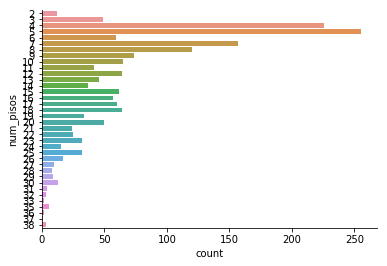

In [42]:
sns.countplot(y=edificios.num_pisos)
sns.despine()

In [43]:
edificios.describe()

,Año,cantidad_unidad,num_pisos,superficie
count,1739.000000,1739.000000,1739.000000,1739.000000
mean,2014.115009,161.678551,11.121909,14299.311098
std,2.098413,181.115765,7.231586,15480.339470
min,2010.000000,3.000000,2.000000,415.000000
25%,2012.000000,45.000000,5.000000,6333.000000
50%,2014.000000,105.000000,8.000000,10489.000000
75%,2016.000000,204.000000,16.000000,16989.500000
max,2017.000000,1401.000000,38.000000,218282.000000


Los edificios són de 2 (verificar) a 38 pisos (OK), construidas en su gran mayoria en Nunoa y Las Condes, con una superficie de 415m2 a 218mil m2, lo que nos parece OK a una primera vista.

Con esto se puede finalizar con que el df_final que utilizara para nuestro analisis sea el de los edificios de mayor de 10 pisos que es promedio. 

In [44]:
df_final = edificios[edificios.num_pisos>10]

In [45]:
df_final.head()

,Comuna,Año,cantidad_unidad,num_pisos,glosa_destino,superficie
81443,santiago,2010,1198,32,edificio,68775
81485,santiago,2010,395,24,edificio,25171
81525,santiago,2010,248,18,edificio,17210
81539,santiago,2011,500,26,edificio,27919
81542,santiago,2011,399,21,edificio,25242


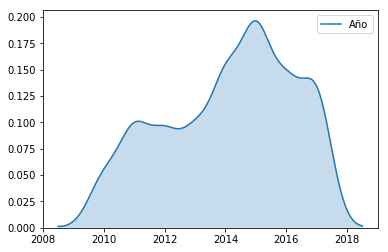

In [46]:
sns.kdeplot(edificios.Año, shade=True)

Se observa iun crecimiento progresivo para los años siguientes al 2010 de las edificaciones mucho mas marcado. Estos resultados se plantea concatenar con la llegada masiva de inmigrantes. Y poder extraer informacion relevante con respecto a donde viven los inmigrantes y de forma el crecimiento del aparato economico y desarrollo economico primordialmente evidenciado en la construccion, se vea impactado por los inmigrantes.